In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.lrn.csv')
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,8,6,10,6,7,2,2,2,3,...,1,0,0,0,0,0,0,0,0,Chell
1,1,13,1,13,9,8,8,2,3,2,...,4,1,2,1,0,1,0,0,0,Engineer
2,2,16,7,6,7,9,3,4,2,6,...,0,0,0,0,1,0,0,0,0,Grove
3,3,8,11,10,11,3,7,0,4,2,...,0,0,1,0,0,0,2,1,0,Davisson
4,4,10,11,8,5,3,4,2,5,5,...,0,0,0,0,0,0,0,0,0,Wilson


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_features = scaler.transform(df.drop('Class', axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,-1.729743,-0.667148,-0.410182,0.966760,-0.129906,0.265447,-0.935059,-0.434196,-0.695732,0.027828,...,-0.384867,1.109292,-0.397250,-0.323400,-0.394041,-0.450704,-0.430273,-0.390662,-0.462312,-0.375244
1,-1.725124,0.208221,-1.850427,1.857874,0.645397,0.574107,1.189003,-0.434196,-0.264849,-0.446508,...,-0.384867,5.511243,1.537411,3.045354,1.365069,-0.450704,1.561732,-0.390662,-0.462312,-0.375244
2,-1.720505,0.733443,-0.122133,-0.221392,0.128528,0.882767,-0.581049,0.067571,-0.695732,1.450834,...,-0.384867,-0.358025,-0.397250,-0.323400,-0.394041,1.597949,-0.430273,-0.390662,-0.462312,-0.375244
3,-1.715887,-0.667148,1.030063,0.966760,1.162266,-0.969191,0.834993,-0.935964,0.166034,-0.446508,...,3.268934,-0.358025,-0.397250,1.360977,-0.394041,-0.450704,-0.430273,3.886663,1.553584,-0.375244
4,-1.711268,-0.317001,1.030063,0.372684,-0.388341,-0.969191,-0.227039,-0.434196,0.596917,0.976499,...,-0.384867,-0.358025,-0.397250,-0.323400,-0.394041,-0.450704,-0.430273,-0.390662,-0.462312,-0.375244


In [8]:
df_test = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.tes.csv')
df_test_feat = pd.DataFrame(df_test, columns=df.columns[:-1])


In [9]:
df_test_feat.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,750,15,10,6,7,9,3,3,3,1,...,0,0,1,1,0,0,0,0,0,0
1,751,8,10,7,2,5,7,2,5,3,...,0,4,0,0,0,0,0,2,1,0
2,752,18,9,7,8,8,7,12,6,7,...,0,0,1,0,0,0,1,0,0,1
3,753,6,5,4,2,4,1,1,1,0,...,0,2,0,0,0,0,0,1,0,0
4,754,9,3,2,5,9,3,0,3,2,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df_test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,750,15,10,6,7,9,3,3,3,1,...,0,0,1,1,0,0,0,0,0,0
1,751,8,10,7,2,5,7,2,5,3,...,0,4,0,0,0,0,0,2,1,0
2,752,18,9,7,8,8,7,12,6,7,...,0,0,1,0,0,0,1,0,0,1
3,753,6,5,4,2,4,1,1,1,0,...,0,2,0,0,0,0,0,1,0,0
4,754,9,3,2,5,9,3,0,3,2,...,0,0,0,0,0,0,0,1,0,0


In [11]:
X_train = df_feat
X_test = df_test_feat
y_train = df['Class']
# y_test = df_test['Class']

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
error_rate = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_train)) # maybe pointless?



Text(0, 0.5, 'Error rate')

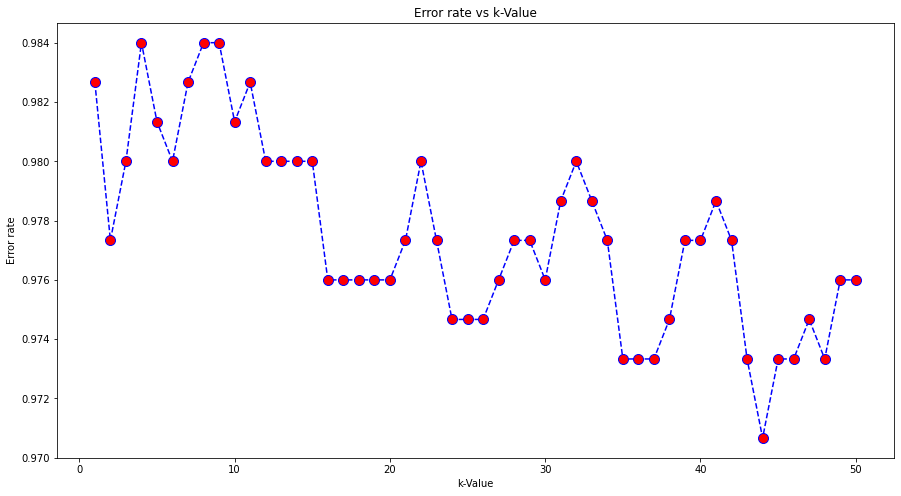

In [14]:
plt.figure(figsize=(15,8))
plt.plot(range(1,51), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs k-Value')
plt.xlabel('k-Value')
plt.ylabel('Error rate')

In [15]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(1, 51)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train, y_train)
print("Best k-Value is: ", model.best_params_['n_neighbors'])

Best k-Value is:  1


In [16]:
pred = model.predict(X_test)

In [17]:
solution_data = list(zip(list(range(750,1500)), pred))

In [18]:
solution_table = pd.DataFrame(solution_data, columns=['ID', 'Class'])
solution_table.head()

,ID,Class
0,750,Robert
1,751,Hayes
2,752,Chandler
3,753,Morrison
4,754,Chandler
